# Introduction to Unsupervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 13)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Clustering

First let's load the iris data set, which is included in `scikit-learn`, and read its description. The `iris` object below acts like a dictionary that includes tabular data along with some metadata.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

#print(iris)
data = iris['data']
#print(data)

**Problem 1a** Make a pair plot (a.k.a. scatter matrix, a.k.a. corner plot) showing all four features plotted against each other. You can do this any way you want, but I suggest using `pandas.plotting.scatter_matrix` or `seaborn.pairplot` instead of `corner.corner` because there are so few points.

In [5]:
import pandas as pd

data = iris['data']
df = pd.DataFrame(data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])


#pd.plotting.scatter_matrix(df)


**Problem 1b** Let's try to find clusters in this 4-dimensional feature space. Fit two different $K$-means models to the iris data, one with 2 clusters and one with 3 clusters. Make new pair plots but color the points by their cluster membership. According to your plots, which feature(s) is/are most correlated with the clusters? Why might that be?

array([[<Axes: xlabel='sepal length', ylabel='sepal length'>,
        <Axes: xlabel='sepal width', ylabel='sepal length'>,
        <Axes: xlabel='petal length', ylabel='sepal length'>,
        <Axes: xlabel='petal width', ylabel='sepal length'>,
        <Axes: xlabel='cluster3', ylabel='sepal length'>],
       [<Axes: xlabel='sepal length', ylabel='sepal width'>,
        <Axes: xlabel='sepal width', ylabel='sepal width'>,
        <Axes: xlabel='petal length', ylabel='sepal width'>,
        <Axes: xlabel='petal width', ylabel='sepal width'>,
        <Axes: xlabel='cluster3', ylabel='sepal width'>],
       [<Axes: xlabel='sepal length', ylabel='petal length'>,
        <Axes: xlabel='sepal width', ylabel='petal length'>,
        <Axes: xlabel='petal length', ylabel='petal length'>,
        <Axes: xlabel='petal width', ylabel='petal length'>,
        <Axes: xlabel='cluster3', ylabel='petal length'>],
       [<Axes: xlabel='sepal length', ylabel='petal width'>,
        <Axes: xlabel='sepal 

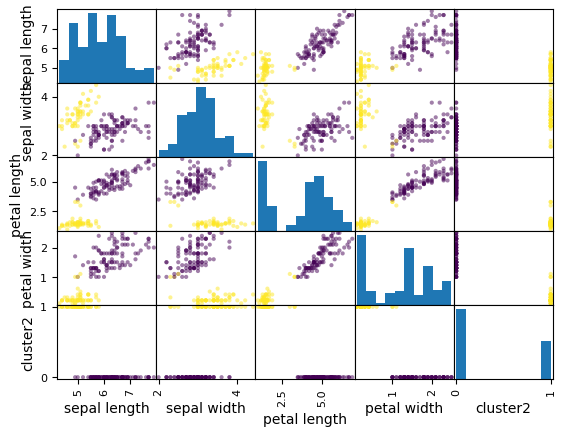

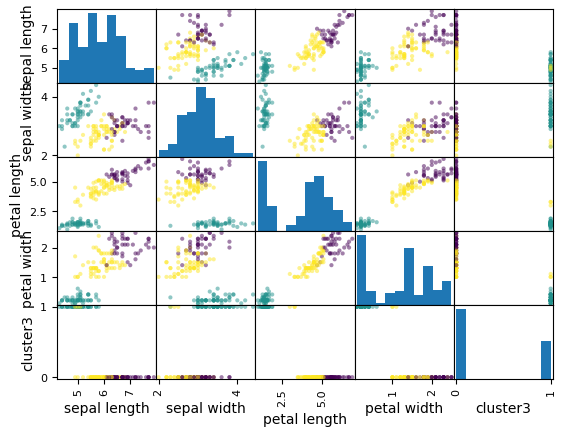

In [6]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2)  # complete
kmeans2.fit(df)  # complete
clusters2 = kmeans2.labels_  # complete

df2 = pd.DataFrame(data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

df2['cluster2'] = clusters2
pd.plotting.scatter_matrix(df2, marker='.', c=clusters2)

# repeat with 3 clusters
kmeans3 = KMeans(n_clusters=3)  # complete
kmeans3.fit(df)  # complete
clusters3 = kmeans3.labels_   # complete

df3 = pd.DataFrame(data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

df3['cluster3'] = clusters2
pd.plotting.scatter_matrix(df3, marker='.', c=clusters3)

#print(clusters3)

*Complete*

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a Gaussian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 1c** Re-scale the features to normal distributions, and perform $K$-means clustering on the iris data. How do the results compare to those obtained earlier? 

array([[<Axes: xlabel='sepal length', ylabel='sepal length'>,
        <Axes: xlabel='sepal width', ylabel='sepal length'>,
        <Axes: xlabel='petal length', ylabel='sepal length'>,
        <Axes: xlabel='petal width', ylabel='sepal length'>,
        <Axes: xlabel='fit_cluster3', ylabel='sepal length'>],
       [<Axes: xlabel='sepal length', ylabel='sepal width'>,
        <Axes: xlabel='sepal width', ylabel='sepal width'>,
        <Axes: xlabel='petal length', ylabel='sepal width'>,
        <Axes: xlabel='petal width', ylabel='sepal width'>,
        <Axes: xlabel='fit_cluster3', ylabel='sepal width'>],
       [<Axes: xlabel='sepal length', ylabel='petal length'>,
        <Axes: xlabel='sepal width', ylabel='petal length'>,
        <Axes: xlabel='petal length', ylabel='petal length'>,
        <Axes: xlabel='petal width', ylabel='petal length'>,
        <Axes: xlabel='fit_cluster3', ylabel='petal length'>],
       [<Axes: xlabel='sepal length', ylabel='petal width'>,
        <Axes: xl

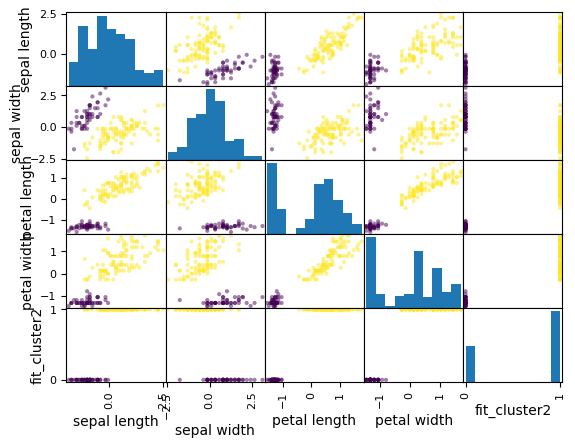

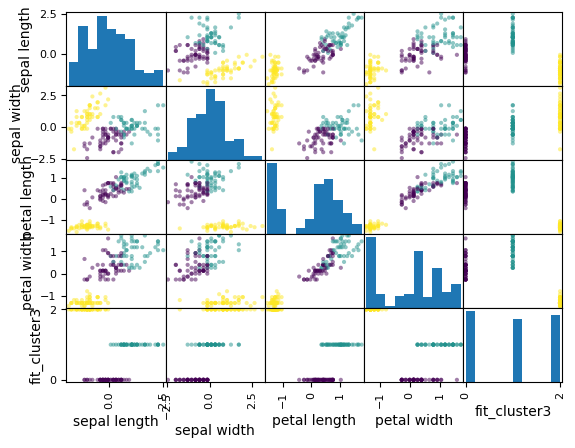

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler_df= scaler.transform(df)

scaler_df2 = pd.DataFrame(scaler_df, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

fit_kmeans2 = KMeans(n_clusters=2)  # complete
fit_kmeans2.fit(scaler_df2)  # complete
clusters2 = fit_kmeans2.labels_  # complete
scaler_df2['fit_cluster2'] = clusters2
pd.plotting.scatter_matrix(scaler_df2, marker='.', c=clusters2)

scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)

scaler_df3 = pd.DataFrame(scaler_df, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

fit_kmeans3 = KMeans(n_clusters=3)  # complete
fit_kmeans3.fit(scaler_df3)  # complete
clusters3 = fit_kmeans3.labels_  # complete
scaler_df3['fit_cluster3'] = clusters3
pd.plotting.scatter_matrix(scaler_df3, marker='.', c=clusters3)


# plot

*Complete*

**Problem 2d** Let's try more complex feature engineering using principal component analysis. Find the principal components of the iris data set and cluster the data points according their projection onto the **top 2** principal components. How much of the variance do these two components capture?  
Plot the results both in the principal component space *and* in the original feature space. How do your results compare to the simpler preprocessing? Is there another benefit to using PCA?

[0.72962445 0.22850762]


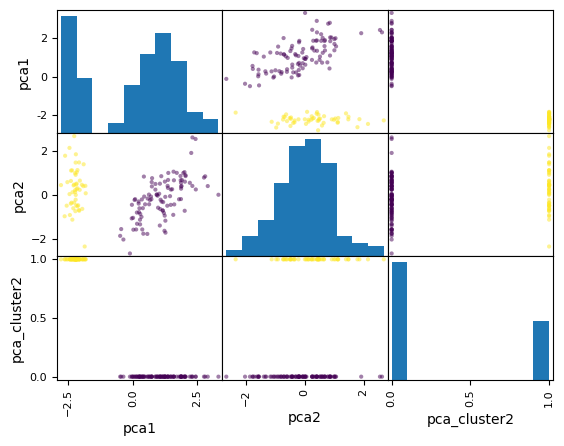

In [14]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(df)  
scaler_df = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(scaler_df)
scaled_pca_df = pca.transform(scaler_df) 

scaled_pca_df = pd.DataFrame(scaled_pca_df, columns=['pca1', 'pca2'])

pca_kmeans2 = KMeans(n_clusters=2)  # complete
pca_kmeans2.fit(scaled_pca_df)  # complete
clusters2 = pca_kmeans2.labels_  # complete
scaled_pca_df['pca_cluster2'] = clusters2

pd.plotting.scatter_matrix(scaled_pca_df, marker='.', c=clusters2)

# complete PCA
# complete PCA
# complete PCA
print(pca.explained_variance_ratio_)
# complete clustering
# complete clustering
# complete clustering

# plot in PCA space
# plot in PCA space
# plot in PCA space

# plot in feature space

*Complete*

**Problem 2e** Our data set might include outliers that should not belong to any of the clusters, but $K$-means will always assign points to the nearest cluster. Instead, try clustering the iris data using an algorithm called `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $K$-means? Can you obtain 3 clusters with `DBSCAN`?

*Note - DBSCAN labels outliers as `-1`, so all these points will be plotted as the same color.*


In [ ]:
from sklearn.cluster import DBSCAN

# complete
# complete
# complete

# plot

*Complete*

# Problem 2) Correlation Function

Imagine we looked in the sky in a certain direction and saw a perfect circle of 50 galaxies with a radius of 1$^\circ$. This would imply highly correlated structure in the universe on the scale of $\sim 2^\circ$. Let's show this by calculating the correlation function for such a structure.

**Problem 2a** Generate the data set in question, the right ascension and declination ($x$ and $y$) for a circle of 50 galaxies centered on (0, 0) with radius $1^\circ$. Ignore spherical geometry for now and just assume everything is Euclidean for this small patch of sky.

In [ ]:
# generate data
# generate data
# generate data

ax = plt.axes(aspect='equal')
ax.plot(xx, yy, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2b** Generate a data set of randomly distributed points over the same patch of sky. Make sure your data set is $\sim20\times$ larger than the "observed" data set above. To avoid edge effects, I suggest using $-4<x,y<4$.

In [ ]:
# generate data
# generate data
# generate data

ax = plt.axes(aspect='equal')
ax.plot(xr, yr, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)

**Problem 2c** Calculate the distance between each pair of points in each data set. Plot histograms of each set of distances.  
*Hint:* exclude pairs matching the same point with itself.  
*Challenge:* try using broadcasting instead of loops to make each pair. 

In [ ]:
# calculate distances
# calculate distances

n_rand, bins, _ = plt.hist(  # complete
n_real, bins, _ = plt.hist(  # complete
plt.legend(loc='best')
plt.xlabel('Separation (deg)')

**Problem 2d** Estimate the two-point autocorrelation function for the real data, with the random data as a reference. Plot it as a function of separation. What did you learn about the large-scale structure in this portion of the sky?

In [ ]:
autocorr =   # complete
plt.stairs(autocorr, bins)
plt.xlabel('Separation (deg)')
plt.ylabel('Autocorrelation')

*Complete*